Variable	            Description

Loan_ID	   :-             Unique Loan ID

Gender	    :-            Male/ Female

Married	     :-           Applicant married (Y/N)

Dependents     :-     	Number of dependents

Education        :-    	Applicant Education (Graduate/ Under Graduate)

Self_Employed	:-       Self employed (Y/N)

ApplicantIncome	   :-     Applicant income

CoapplicantIncome    :-	Coapplicant income

LoanAmount	        :-    Loan amount in thousands

Loan_Amount_Term    :- 	Term of loan in months

Credit_History	   :-     credit history meets guidelines

Property_Area	   :-     Urban/ Semi Urban/ Rural

Loan_Status        :- 	Loan approved (Y/N)


* Import required libraries

In [1]:
import pandas as pd
import numpy as np     # For mathematical calculation
import seaborn as sns  # For data visualisation
import matplotlib.pyplot as plt # For plotting graph
%matplotlib inline
import warnings        # To ignore any warning
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

**Load train and test DataSet** 

In [2]:
df_train=pd.read_csv("C:\\Users\\DHIRAJ PATIL\\Desktop\\python\\PythonImarticus\\PythonProject\\CrediRiskProject\\credit_risk_train_data.csv")

df_test=pd.read_csv("C:\\Users\\DHIRAJ PATIL\\Desktop\\python\\PythonImarticus\\PythonProject\\CrediRiskProject\\credit_risk_test_data.csv")

**Make a copy of original data set so that we won't miss original dataset after performing transformations**

In [3]:
train=df_train.copy()
test=df_test.copy()

**Shuffle the dataset**

In [4]:
train=train.sample(frac=1,random_state=123)
test=test.sample(frac=1,random_state=123)

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
train.columns
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
missmap=train.isnull().sum().to_frame()
missmap=missmap.sort_values(0,ascending=False)
missmap
test.isnull().sum().to_frame()

,0
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
Gender,13
Married,3
Loan_ID,0
Education,0
ApplicantIncome,0


,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 583 to 510
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [9]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
train.head()
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
583,LP002898,Male,Yes,1,Graduate,No,1880,0.0,61.0,360.0,NaN,Rural,N
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y
442,LP002418,Male,No,3+,Not Graduate,No,4707,1993.0,148.0,360.0,1.0,Semiurban,Y
267,LP001882,Male,Yes,3+,Graduate,No,4333,1811.0,160.0,360.0,0.0,Urban,Y


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
59,LP001324,Male,Yes,3+,Graduate,No,4720,0,90.0,180.0,1.0,Semiurban
245,LP002355,NaN,Yes,0,Graduate,No,3186,3145,150.0,180.0,0.0,Semiurban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban
300,LP002644,Male,Yes,1,Graduate,Yes,7500,0,75.0,360.0,1.0,Urban
291,LP002604,Male,Yes,2,Graduate,No,3166,2833,145.0,360.0,1.0,Urban


In [11]:
print('Train Dataset-Rows,Columns:',train.shape)
print('Test Dataset-Rows,Columns:',test.shape)

Train Dataset-Rows,Columns: (614, 13)
Test Dataset-Rows,Columns: (367, 12)


**EDA**

**Target variable-Loan_Status**


**Drop unnecessary columns**

In [12]:
train=train.drop(['Loan_ID'],axis=1)
test=test.drop(['Loan_ID'],axis=1)

**Y variable :- 'Loan_Status'**

In [13]:
train['Loan_Status'].value_counts(normalize=True).to_frame()

,Loan_Status
Y,0.687296
N,0.312704


**'Gender'**

In [14]:
train['Gender'].value_counts(normalize=True)
train['Gender'].fillna('Male',inplace=True)
test['Gender'].fillna('Male',inplace=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [15]:
train['Gender'].isnull().sum()
test['Gender'].isnull().sum()

0

0

**Most applicants are Male,around 80% ,whereas Female are only 18%**

In [16]:
train.isnull().sum()
test.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender                0
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

**'Married'**

In [17]:
train['Married'].value_counts(normalize=True)
train['Married'].isnull().sum()
train['Married'].fillna('Yes',inplace=True)
train['Married'].isnull().sum()

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

3

0

**Married applicants are more (65%) than single applicants**

**'Dependents'**

In [18]:
# replace '3+' by 3
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Dependents'].value_counts(normalize=True)

0    0.575960
1    0.170284
2    0.168614
3    0.085142
Name: Dependents, dtype: float64

In [19]:
train['Dependents'].isnull().sum()
test['Dependents'].isnull().sum()

15

10

In [20]:
# Fill missing values of 'Dependents'
train['Dependents'].fillna(0,inplace=True)
test['Dependents'].fillna(0,inplace=True)

**'Education'**

In [21]:
train['Education'].value_counts(normalize=True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

**Around 80% applicants are graduated which means educated people take more loans**

**'Self_Employed'**

In [22]:
train['Self_Employed'].value_counts(normalize=True)
train['Self_Employed'].isnull().sum()
test['Self_Employed'].isnull().sum()

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

32

23

**Self_Employed people around 85 % apply for loan**

In [23]:
# Fill missing values of 'Self_Employed'
train['Self_Employed'].fillna('No',inplace=True)
test['Self_Employed'].fillna('No',inplace=True)

**'ApplicantIncome'**

In [24]:
#train['ApplicantIncome'].value_counts()
train['ApplicantIncome'].median()
train['ApplicantIncome'].isnull().sum()

3812.5

0

In [25]:
def rank_performance(income):
    if income >= 3812:
        return 'Above Avg'
    else:
        return 'Below Avg'

In [26]:
train['ApplicantIncome'].apply(rank_performance).value_counts(normalize=True)

Above Avg    0.501629
Below Avg    0.498371
Name: ApplicantIncome, dtype: float64

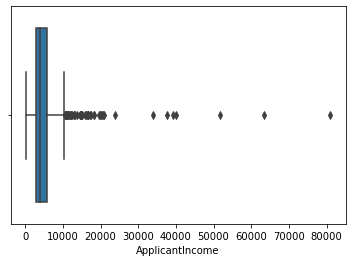

In [27]:
sns.boxplot(train['ApplicantIncome'])
plt.show()

**Outliers are present in ApplicantIncome,but we can't remove it because they are real ouliers**

**'CoapplicantIncome'**

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

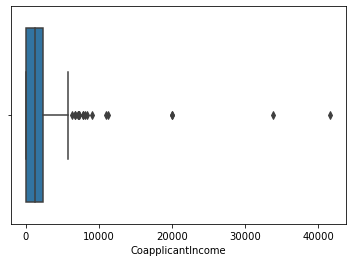

In [28]:
train['CoapplicantIncome'].describe()
sns.boxplot(train['CoapplicantIncome'])

**Outliers are present in CoapplicantIncome,but we can't remove it because they are real ouliers**

**'LoanAmount'**

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

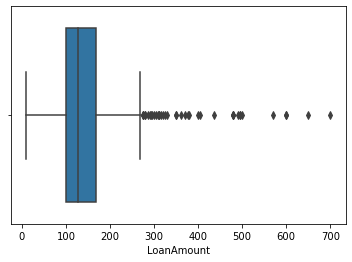

In [29]:
train['LoanAmount'].describe()
sns.boxplot(train['LoanAmount'])

**Outliers are present in 'LoanAmount'**

**Most LoanAmount values are below 200**

In [30]:
train['LoanAmount'].isnull().sum()
test['LoanAmount'].isnull().sum()

22

5

In [31]:
train.groupby('Gender')['LoanAmount'].median()
test.groupby('Gender')['LoanAmount'].median()

Gender
Female    113.0
Male      130.0
Name: LoanAmount, dtype: float64

Gender
Female    112.0
Male      130.0
Name: LoanAmount, dtype: float64

In [32]:
# Fill missing values of 'LoanAmount' with median values
train.loc[train['Gender'].eq('Female') & train['LoanAmount'].isnull(),'LoanAmount']=113
train.loc[train['Gender'].eq('Male') & train['LoanAmount'].isnull(),'LoanAmount']=130
test.loc[test['Gender'].eq('Female') & test['LoanAmount'].isnull(),'LoanAmount']=112
test.loc[test['Gender'].eq('Male') & test['LoanAmount'].isnull(),'LoanAmount']=130

**'Loan_Amount_Term'**

In [33]:
train['Loan_Amount_Term'].value_counts(normalize=True).head()
train['Loan_Amount_Term'].fillna(360,inplace=True)
test['Loan_Amount_Term'].fillna(360,inplace=True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
Name: Loan_Amount_Term, dtype: float64

**Most LoanAmountTerms are one Year**

**Credit_History**

In [34]:
# Independent variaable(ordinal)
train['Credit_History'].value_counts(normalize=True)
train['Credit_History'].fillna(1,inplace=True)
test['Credit_History'].fillna(1,inplace=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

**Infer :- Approximate 85% applicants are have good credit history**

**'Property_Area'**

In [35]:
train['Property_Area'].value_counts(normalize=True)
train.groupby('Property_Area').size()

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

Property_Area
Rural        179
Semiurban    233
Urban        202
dtype: int64

**Infer :- Many applicants are from SemiUrban and Urban region**

In [36]:
train.isnull().sum()
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [37]:
#train.to_csv('C:\\Users\\DHIRAJ PATIL\\Desktop\\python\\PythonImarticus\\PythonProject\\CrediRiskProject\\trainFormulated.csv')
test.to_csv('C:\\Users\\DHIRAJ PATIL\\Desktop\\python\\PythonImarticus\\PythonProject\\CrediRiskProject\\testFormulated.csv')

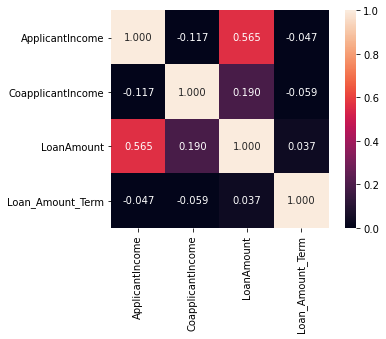

In [38]:
numeric_data =train.select_dtypes(include=[np.number])
categorical_data =train.select_dtypes(exclude=[np.number])
cols=numeric_data.columns
totalcols=len(cols)
cor=numeric_data.iloc[:,0:totalcols-1].corr()
sns.heatmap(cor,xticklabels=cols[0:totalcols-1],
            yticklabels=cols[0:totalcols-1],annot=True,fmt='.3f',
            vmax=1,vmin=0,square=True)

In [39]:
from sklearn.utils import resample

In [40]:
# Separate majority and minority classes
train_majority = train[train.Loan_Status=='Y']
train_minority = train[train.Loan_Status=='N']

 
# Upsample minority class
train_minority_upsampled = resample(train_minority,replace=True,n_samples=338,random_state=2)
 
# Combine majority class with upsampled minority class
train = pd.concat([train_majority,train_minority_upsampled])

In [41]:
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
trainX=train.drop(['Loan_Status'],axis=1)
trainY=train['Loan_Status']
testX=test.copy(deep=True)

In [42]:
trainX=pd.get_dummies(trainX,drop_first=True)
testX=pd.get_dummies(testX,drop_first=True)

In [43]:
trainX.shape
trainY.value_counts(normalize=True)
trainY.shape

(760, 15)

1    0.555263
0    0.444737
Name: Loan_Status, dtype: float64

(760,)

In [44]:
path="C:\\Users\\DHIRAJ PATIL\\Desktop\\python\\PythonImarticus\\PythonProject\\CrediRiskProject\\credit_risk_validate_data.csv"
validate=pd.read_csv(path)
#validate.shape
#testX.columns
testY=validate['outcome']
testY.replace('Y',1,inplace=True)
testY.replace('N',0,inplace=True)

In [45]:
# Building models
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [46]:
# module imports
from patsy import dmatrices
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm

In [47]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('SVM',SVC()))
models.append(('XGB',XGBRegressor()))
models.append(('CART',DecisionTreeClassifier()))

In [48]:
# Evaluate each model in turn
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=7,shuffle=True,random_state=123)
    cv_results=model_selection.cross_val_score(model,trainX,trainY,cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)


LR: 0.698643 (0.065240)
KNN: 0.638246 (0.042208)
SVM: 0.560422 (0.059070)
XGB: 0.548851 (0.142751)
CART: 0.835615 (0.043975)


**Logistic regression gives best performance**

In [49]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(trainX,trainY)
y_predict=model.predict(testX)
from sklearn.metrics import accuracy_score
# Convert probablities to classes
y_predict[y_predict<=0.5]=0
y_predict[y_predict>0.5]=1
accuracy_score(testY,y_predict)
pd.crosstab(testY,y_predict)

LogisticRegression()

0.6648501362397821

col_0,0,1
outcome,,
0,21,56
1,67,223


In [50]:
# Model Building using statsmodel library
import statsmodels.api as sm
model=sm.Logit(trainY,trainX).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.531701
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.226     
Dependent Variable:   Loan_Status        AIC:                838.1857  
Date:                 2020-11-22 09:44   BIC:                907.6855  
No. Observations:     760                Log-Likelihood:     -404.09   
Df Model:             14                 LL-Null:            -522.14   
Df Residuals:         745                LLR p-value:        2.1386e-42
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
ApplicantIncome          0.0000   0.0000  0.1897 0.8496 -0.0000  0.0000
CoapplicantIncome        0.0000   0.0001  0.8534 0.3934 -0.0001  0.0001
LoanAmount              -0.0025   0.0013 -1.8944 0.0582 -0.0051  0.0001
Loan_Amount_Term        -0.0032   0.0012 -2.6522 0.0080 -0.0056 -0.0008
Credit_History           3.6782   0.3864  9.5189 0.0000  2.9209  4.4356
Gender_Male              0.1131   0.2328  0.4860 0.6270 -0.3431  0.5693
Married_Yes              0.2561   0.2066  1.2394 0.2152 -0.1489  0.6611
Dependents_3            -1.9390   0.6156 -3.1497 0.0016 -3.1456 -0.7324
Dependents_0            -2.0016   0.5587 -3.5823 0.0003 -3.0967 -0.9064
Dependents_1            -2.3717   0.5852 -4.0528 0.0001 -3.5187 -1.2247
Dependents_2            -1.5513   0.5959 -2.6032 0.0092 -2.7194 -0.3833
Education_Not Graduate  -0.6307   0.2063 -3.0569 0.0022 -1.0351 -0.2263
Self_Employed_Yes        0.2312   0.2705  0.8546 0.3928 -0.2990  0.7613
Property_Area_Semiurban  0.7181   0.2114  3.3965 0.0007  0.3037  1.1325
Property_Area_Urban      0.1014   0.2117  0.4791 0.6319 -0.3135  0.5164
=======================================================================

"""

In [51]:
predictions=model.predict(testX)
predictions[0:10]

59     0.884484
245    0.151751
9      0.626797
300    0.664127
291    0.769582
156    0.791084
170    0.562038
79     0.606875
165    0.032781
231    0.680068
dtype: float64

In [52]:
c1=len(predictions[predictions<=0.5])
c2=len(predictions[predictions>=0.5])
print("<=0.5 {},>0.5 {}".format(c1,c2))

<=0.5 82,>0.5 285


In [53]:
# Convert probablities to classes
predictions[predictions<=0.5]=0
predictions[predictions>0.5]=1

In [54]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(testY,predictions)

# Classification report
from sklearn.metrics import classification_report as cr
print(cr (testY,predictions))

# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(testY,predictions)

array([[ 19,  58],
       [ 63, 227]], dtype=int64)

              precision    recall  f1-score   support

           0       0.23      0.25      0.24        77
           1       0.80      0.78      0.79       290

    accuracy                           0.67       367
   macro avg       0.51      0.51      0.51       367
weighted avg       0.68      0.67      0.67       367



0.670299727520436

In [55]:
# Feature selection
from sklearn.feature_selection import f_classif as fs
features=trainX.columns
f_score,p_val=fs(trainX,trainY)

In [56]:
# Store the features selection in a dataframe
df=pd.DataFrame({'feature':features,'f-score':f_score,'p-val':p_val})
print(df)

                    feature     f-score         p-val
0           ApplicantIncome    1.937356  1.643642e-01
1         CoapplicantIncome    3.561088  5.953084e-02
2                LoanAmount    0.582127  4.457173e-01
3          Loan_Amount_Term    0.588160  4.433701e-01
4            Credit_History  227.781580  3.388099e-45
5               Gender_Male    1.263050  2.614304e-01
6               Married_Yes    5.527115  1.897919e-02
7              Dependents_3    1.169422  2.798639e-01
8              Dependents_0    0.087385  7.676086e-01
9              Dependents_1    1.196707  2.743284e-01
10             Dependents_2    3.524141  6.086498e-02
11   Education_Not Graduate   10.161562  1.492863e-03
12        Self_Employed_Yes    0.349833  5.543839e-01
13  Property_Area_Semiurban   10.448680  1.280459e-03
14      Property_Area_Urban    0.224812  6.355342e-01


In [57]:
df[df['p-val']>0.5]

,feature,f-score,p-val
8,Dependents_0,0.087385,0.767609
12,Self_Employed_Yes,0.349833,0.554384
14,Property_Area_Urban,0.224812,0.635534


**IMP Features:-
'ApplicantIncome', 'Loan_Amount_Term', 'Gender', 'Dependents', 'Self_Employed'**